In [1]:
import os
os.chdir('sd')

Using device: cuda


/home/mschwartz/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Converting model from ../data/v1-5-pruned-emaonly.ckpt
Model converted successfully!
Encoder loaded
Decoder loaded
Diffusion loaded
CLIP loaded


100%|██████████| 50/50 [00:04<00:00, 10.21it/s]


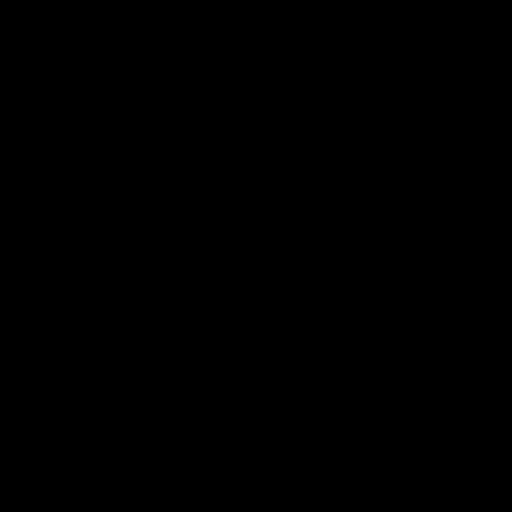

In [3]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
	DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
	DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

### TEXT TO IMAGE

prompt = "A painting of a forest, highly detailed, sharp, 4k resolution, with a lot of green and brown colors"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7.0

## IMAGE TO IMAGE

input_image = None
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)
